In [9]:
import nn_functions
import pandas as pd

In [8]:
x_train, x_test, y_train, y_test, predictors = nn_functions.get_data('../../python_modeling/arjuna/plutoPCA_fulltot.csv','assesstot')

In [5]:
input_nodes = len(predictors)
epochs = 30
hidden_nodes = [int((input_nodes+1)*(2/3)), int(len(x_train)/(30*2)), int(len(x_train)/(30*4)), int(len(x_train)/(30*6)), int(len(x_train)/(30*8))]
optimizers = ['rmsprop', 'adam','adagrad','adadelta']
h = []
o = []
df_models = pd.DataFrame()
for i in hidden_nodes:
    for j in optimizers:
        h.append(i)
        o.append(j)
        
df_models['hidden_nodes'] = h
df_models['optimizer']  = o
df_models

,hidden_nodes,optimizer
0,114,rmsprop
1,114,adam
2,114,adagrad
3,114,adadelta
4,10357,rmsprop
5,10357,adam
6,10357,adagrad
7,10357,adadelta
8,5178,rmsprop
9,5178,adam


W0802 00:14:26.195436 4673353152 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: 0 hidden_nodes: 114 optimizer: rmsprop


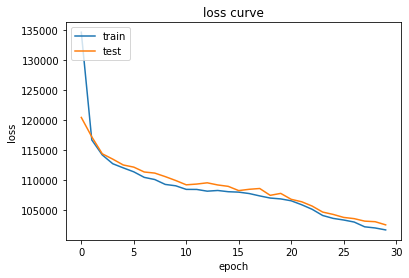

ERROR Training
mse 30269314888.622
RMSE 173980.789
R2 0.732
error 3894.4342142492296
ERROR Test
mse 31681442019.723
RMSE 177992.815
R2 0.734
error 4480.557872405331
Model: 1 hidden_nodes: 114 optimizer: adam


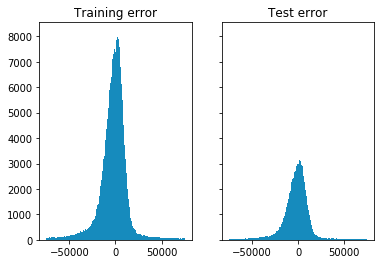

/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


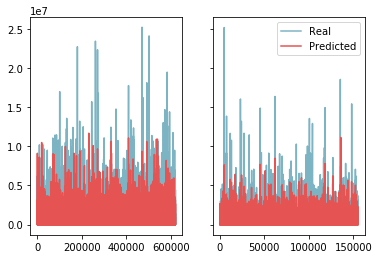

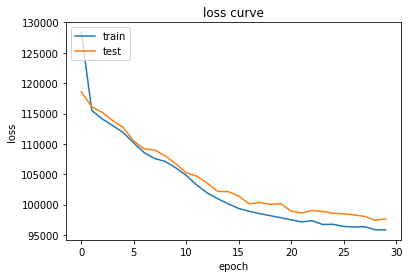

ERROR Training
mse 25352434248.167
RMSE 159224.478
R2 0.776
error 3857.939968776656
ERROR Test
mse 29263452108.885
RMSE 171065.637
R2 0.754
error 4434.641773028195
Model: 2 hidden_nodes: 114 optimizer: adagrad


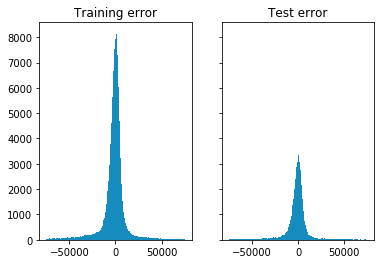

/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


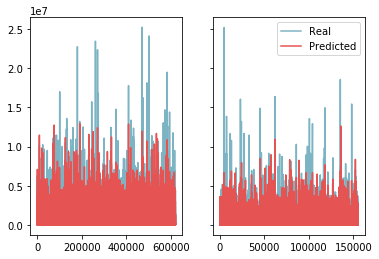

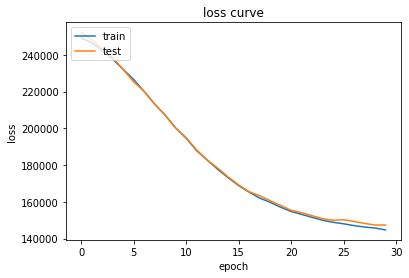

ERROR Training
mse 59769143356.742
RMSE 244477.286
R2 0.472
error 18137.11729529156
ERROR Test
mse 64200185644.513
RMSE 253377.556
R2 0.46
error 18759.287677682594
Model: 3 hidden_nodes: 114 optimizer: adadelta


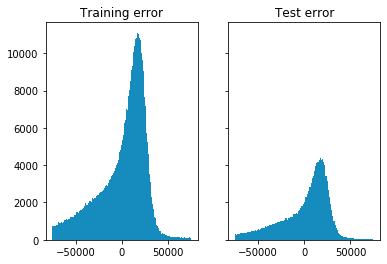

/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


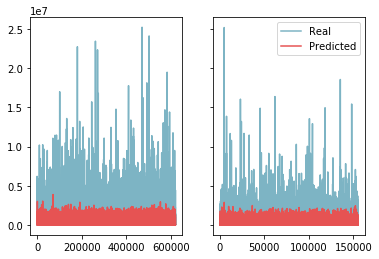

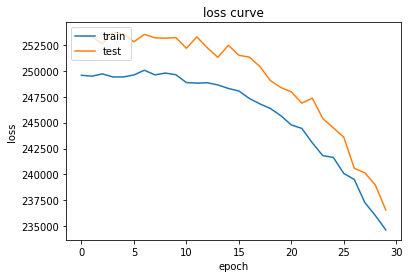

ERROR Training
mse 113201727341.94
RMSE 336454.644
R2 -0.001
error 81139.28746926588
ERROR Test
mse 119058347944.985
RMSE 345048.327
R2 -0.001
error 82043.61077083286
Model: 4 hidden_nodes: 10357 optimizer: rmsprop


KeyboardInterrupt: 

/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


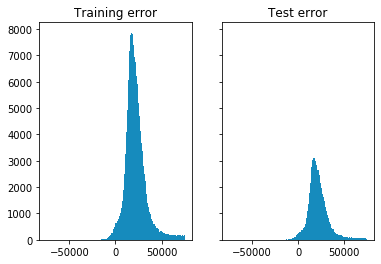

/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


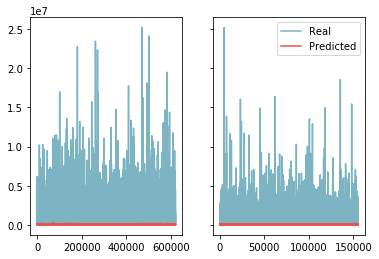

In [6]:
mse_list = []
rmse_list = []
r2_list = []
error_list = []
for index, row in df_models.iterrows():
    try:
        print('Model:', index, 'hidden_nodes:', row['hidden_nodes'], 'optimizer:', row['optimizer'])
        y_train_pred, y_test_pred, mse,rmse,r2,error = nn_functions.run_model(input_nodes, row['hidden_nodes'], x_train, x_test, y_train, y_test, row['optimizer'], epochs)
    except Exception as ex:
        print(ex)
        mse = float('nan')
        rmse = float('nan')
        r2 = float('nan')
        error = float('nan')
        print('Error while computing model: ', index)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)
    error_list.append(error)
        
df_models['mse'] = mse_list
df_models['rmse'] = rmse_list
df_models['r2'] = r2_list
df_models['error'] = error_list


In [ ]:
max_r2 = df_models['r2'].idxmax(axis=0, skipna=True)
print('Max r2:', max_r2)
print(df_models.loc[max_r2])
min_rmse = df_models['rmse'].idxmin(axis=0, skipna=True)
print('Min rmse:', min_rmse)
print(df_models.loc[min_rmse])
df_models